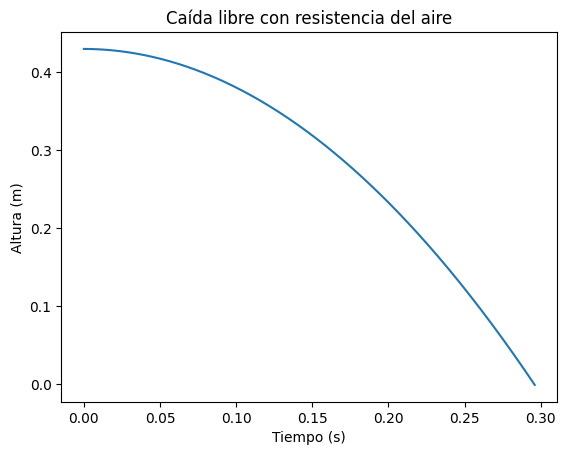

Tiempo final: 0.2960000000000002 s
aceleración final: -9.815630029807533 s


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


# Parámetros iniciales
m = 0.02  # Masa del objeto (kg)
rho_aire = 0.8241  # Densidad del aire (kg/m^3)
g = -9.81  # Aceleración de la gravedad (m/s^2)
Cd = 0.47  # Coeficiente de arrastre (esfera)
r = 0.0047  # Radio del objeto (m)
A = np.pi * r**2  # Área de la sección transversal

# Condiciones iniciales
v0 = 0  # Velocidad inicial (m/s)
y0 = 0.43  # Altura inicial (m)
t = 0  # Tiempo inicial (s)
dt = 0.001  # Paso de tiempo (s)

# Listas para almacenar los datos
t_list = [t]
y_list = [y0]
v_list = [v0]

# Bucle de integración numérica
while y0 > 0:
    # Cálculo de la fuerza de arrastre
    F_arrastre = 0.5 * rho_aire * v0**2 * Cd * A

    # Cálculo de la aceleración
    a = (m * g - F_arrastre) / m

    # Actualización de la velocidad y posición
    v = v0 + a * dt
    y = y0 + v * dt

    # Actualización del tiempo
    t = t + dt

    # Almacenamiento de los datos
    t_list.append(t)
    y_list.append(y)
    v_list.append(v)

    # Actualización de las condiciones iniciales
    v0 = v
    y0 = y


      # Graficar los resultados
plt.plot(t_list, y_list)
plt.xlabel('Tiempo (s)')
plt.ylabel('Altura (m)')
plt.title('Caída libre con resistencia del aire')
plt.show()
print(f"Tiempo final: {t} s")
print(f"aceleración final: {a} s")
tabla_tiempo = pd.DataFrame(t_list)
tabla_tiempo.to_excel('tiempo.xlsx')
tabla_altura = pd.DataFrame(y_list)
tabla_altura.to_excel('altura.xlsx')







In [ ]:
import math

# Condiciones iniciales (Medellín, 31/07 - valores estimados)
P1 = 1.013 * 101325  # Pa (presión atmosférica)
T1 = 291.15  # K (temperatura del recipiente)
T2 = 291.15  # K (temperatura del aire extraído - ajustar si es diferente)

# Volumen de la jeringa
volumen_jeringa = 20 * 1e-6  # m^3

# Número de aspiraciones
n_aspiraciones = 30

# Volumen total extraído (teórico)
volumen_extraido_teorico = volumen_jeringa * n_aspiraciones

# Rango de error en el volumen extraído
error_min = 0.4
error_max = 0.6

# Volumen extraído mínimo y máximo
volumen_extraido_min = volumen_extraido_teorico * (1 - error_max)
volumen_extraido_max = volumen_extraido_teorico * (1 + error_min)

# Volumen inicial del recipiente
volumen_inicial = 500 * 1e-6  # m^3

# Presión final (mínima y máxima)
P2_min = P1 * volumen_inicial / (volumen_inicial + volumen_extraido_max)
P2_max = P1 * volumen_inicial / (volumen_inicial + volumen_extraido_min)

# Constante universal de los gases
R = 8.314  # J/(mol*K)

# Masa molar del aire seco
M = 0.02896  # kg/mol

# Función para calcular la densidad
def calcular_densidad(presion, temperatura, volumen):
    """Calcula la densidad del aire.

    Args:
        presion: Presión en Pa.
        temperatura: Temperatura en K.
        volumen: Volumen en m³.

    Returns:
        Densidad en kg/m³.
    """
    return (presion * M) / (R * temperatura)

# Densidad final (mínima y máxima)
rho2_min = calcular_densidad(P2_min, T1, volumen_inicial - volumen_extraido_max)
rho2_max = calcular_densidad(P2_max, T1, volumen_inicial - volumen_extraido_min)

print("Densidad final del aire (estimada):")
print(f"Mínimo: {rho2_min:.4f} kg/m^3")
print(f"Máximo: {rho2_max:.4f} kg/m^3")


Densidad final del aire (estimada):
Mínimo: 0.4582 kg/m^3
Máximo: 0.8297 kg/m^3
